# Advanced Atom Selection with SMARTS and Mapped SMILES

This notebook demonstrates the advanced atom selection capabilities in rdkit2ase, including support for mapped SMILES patterns and sophisticated hydrogen handling.

In [1]:
from rdkit.Chem import CombineMols, Draw

import rdkit2ase

## Basic Atom Selection with SMARTS

The `select_atoms_grouped` function provides advanced atom selection capabilities beyond the basic `match_substructure` function. Let's start with a simple example using ethanol.

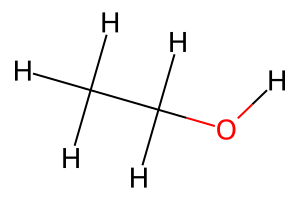

In [2]:
# Create an ethanol molecule with explicit hydrogens
ethanol_smiles = "CCO"
ethanol_mol = rdkit2ase.ase2rdkit(rdkit2ase.smiles2atoms(ethanol_smiles))

# Display the molecule
Draw.MolToImage(ethanol_mol, size=(300, 200))

In [3]:
# Select all carbon atoms using SMARTS
carbon_indices = rdkit2ase.select_atoms_grouped(ethanol_mol, "[#6]")
print(f"Carbon atom indices: {carbon_indices}")

# Select the oxygen atom
oxygen_indices = rdkit2ase.select_atoms_grouped(ethanol_mol, "[#8]")
print(f"Oxygen atom indices: {oxygen_indices}")

Carbon atom indices: [[0, 1]]
Oxygen atom indices: [[2]]


In [4]:
# if we have two molecules, they are returned as a list
# Select all carbon atoms using SMARTS. Indices are returned per molecule
carbon_indices = rdkit2ase.select_atoms_grouped(
    CombineMols(ethanol_mol, ethanol_mol), "[#6]"
)
print(f"Carbon atom indices: {carbon_indices}")

Carbon atom indices: [[0, 1], [9, 10]]


## Hydrogen Handling Options

One of the key features is sophisticated hydrogen handling with three different modes: `exclude` (default), `include`, and `isolated`.

In [5]:
# Select the C-O bond pattern with different hydrogen handling
pattern = "CO"  # Carbon-Oxygen bond

# Default: exclude hydrogens
exclude_h = rdkit2ase.select_atoms_grouped(ethanol_mol, pattern, hydrogens="exclude")
print(f"Exclude hydrogens: {exclude_h}")

# Include hydrogens attached to matched heavy atoms
include_h = rdkit2ase.select_atoms_grouped(ethanol_mol, pattern, hydrogens="include")
print(f"Include hydrogens: {include_h}")

# Return only the hydrogens attached to matched heavy atoms
isolated_h = rdkit2ase.select_atoms_grouped(ethanol_mol, pattern, hydrogens="isolated")
print(f"Isolated hydrogens: {isolated_h}")

Exclude hydrogens: [[1, 2]]
Include hydrogens: [[1, 2, 6, 7, 8]]
Isolated hydrogens: [[6, 7, 8]]


## Mapped SMILES Support

A powerful feature is support for mapped SMILES patterns, where only atoms with map numbers (e.g., [C:1]) are returned from the selection.

In [ ]:
# Using mapped SMILES to select only specific atoms
# This pattern matches the carbon-carbon-oxygen chain,
# but only returns the mapped carbons
mapped_pattern = "[C:1][C:2]O"
mapped_indices = rdkit2ase.select_atoms_grouped(ethanol_mol, mapped_pattern)
print(f"Mapped carbon indices: {mapped_indices}")

# Compare with unmapped pattern which returns all atoms in the match
unmapped_pattern = "CCO"
unmapped_indices = rdkit2ase.select_atoms_grouped(ethanol_mol, unmapped_pattern)
print(f"Unmapped pattern indices: {unmapped_indices}")

Mapped carbon indices: [[0, 1]]
Unmapped pattern indices: [[0, 1, 2]]


## Visualization of Selected Atoms

The `visualize_selected_molecules` function allows you to visualize molecules with highlighted atom selections. It can handle two different selection sets with different colors.

Aromatic carbons: [[1, 2, 3, 4, 5, 6]]
Methyl carbon: [[0, 7, 8, 9]]


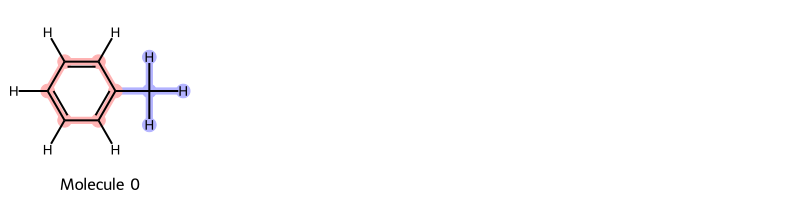

In [7]:
# Create a more complex molecule for better visualization
toluene_smiles = "Cc1ccccc1"  # Toluene
toluene_mol = rdkit2ase.ase2rdkit(rdkit2ase.smiles2atoms(toluene_smiles))

# Select aromatic carbons and methyl carbon
aromatic_carbons = rdkit2ase.select_atoms_grouped(toluene_mol, "c", hydrogens="exclude")
methyl_carbon = rdkit2ase.select_atoms_grouped(
    toluene_mol, "[C;!c]", hydrogens="include"
)

print(f"Aromatic carbons: {aromatic_carbons}")
print(f"Methyl carbon: {methyl_carbon}")

# Visualize with different colors
img = rdkit2ase.visualize_selected_molecules(
    toluene_mol, aromatic_carbons[0], methyl_carbon[0]
)
img

## Advanced Example: Selecting Functional Groups

Let's demonstrate a more complex example with a molecule containing multiple functional groups.

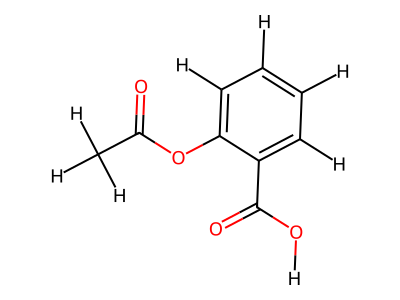

In [8]:
# Create a molecule with multiple functional groups (aspirin)
aspirin_smiles = "CC(=O)Oc1ccccc1C(=O)O"
aspirin_mol = rdkit2ase.ase2rdkit(rdkit2ase.smiles2atoms(aspirin_smiles))
# Display the molecule
Draw.MolToImage(aspirin_mol, size=(400, 300))

Ester oxygen atoms: [[3, 12]]
Carbonyl carbon atoms: [[1, 10]]


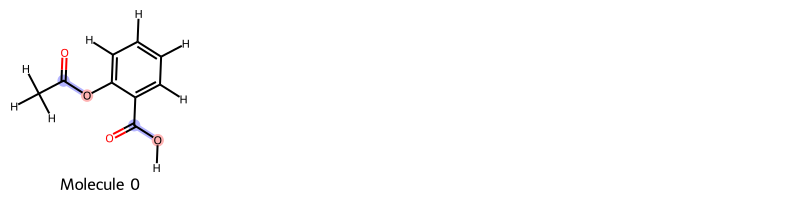

In [9]:
# Select different functional groups using mapped SMILES

# Select only the oxygen atoms in ester groups
ester_oxygens = rdkit2ase.select_atoms_grouped(aspirin_mol, "C(=O)[O:1]")
print(f"Ester oxygen atoms: {ester_oxygens}")

# Select only the carbonyl carbons
carbonyl_carbons = rdkit2ase.select_atoms_grouped(aspirin_mol, "[C:1](=O)")
print(f"Carbonyl carbon atoms: {carbonyl_carbons}")

# Visualize both selections
img = rdkit2ase.visualize_selected_molecules(
    aspirin_mol, ester_oxygens[0], carbonyl_carbons[0]
)
img

## Integration with ASE Atoms Objects

These selection functions work seamlessly with the rdkit2ase workflow for ASE Atoms objects.

## Summary

The advanced atom selection functions provide:

1. **`select_atoms_grouped`**: Advanced atom selection with:
   - Support for both SMARTS and mapped SMILES patterns
   - Sophisticated hydrogen handling (include, exclude, isolated)
   - Returns unique, grouped lists of atom indices

2. **`visualize_selected_molecules`**: Molecule visualization with:
   - Highlighting of two different atom selections
   - Automatic deduplication of identical structures
   - Support for multi-fragment molecules

These functions complement the existing `match_substructure` and `get_substructures` functions by providing more fine-grained control over atom selection and better integration with complex molecular analysis workflows.